This project aims to detect spoken digits from 0-9 using deep learning. 
The database contains 1700 spoken digit files recorded by different individuals.
Deep learning techniques will be used to transcribe speech files into text data before detecting the spoken digits. 
We will use Python and TensorFlow/Keras to implement the model and evaluate its performance using test data.


Data link :https://www.kaggle.com/datasets/subhajournal/free-spoken-digit-database

By : Ali Osama Abdien

In [6]:
import librosa
import numpy as np
import os

# Define file paths for each digit
file_paths = {
    '0': 'zero',
    '1': 'one',
    '2': 'two',
    '3': 'three',
    '4': 'four',
    '5': 'five',
    '6': 'six',
    '7': 'seven',
    '8': 'eight',
    '9': 'nine'
}




In [7]:
# Define the number of frames
n_frames = 40
# Loop through all files in file paths and extract MFCCs
for label, file_path in file_paths.items():  
    for file_name in os.listdir(file_path):  # يتم التكرار عبر الملفات في كل مجلد
        file_path_full = os.path.join(file_path, file_name)
        audio, sr = librosa.load(file_path_full, sr=16000)  # يتم تحميل الملف الصوتي
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)  # يتم استخراج خصائص MFCCs للملف الصوتي
        
        # Pad or truncate the MFCCs to a fixed number of frames
        if mfccs.shape[1] < n_frames:  # إذا كان عدد الإطارات أقل من n_frames، يتم استخدام دالة np.pad() لإضافة حشو صفري
            mfccs = np.pad(mfccs, ((0, 0), (0, n_frames - mfccs.shape[1])), mode='constant')
        else:  # إذا كان عدد الإطارات أكبر من n_frames، يتم قص المصفوفة إلى n_frames
            mfccs = mfccs[:, :n_frames]
        
        # Normalize the MFCCs
        mfccs_normalized = (mfccs - np.mean(mfccs)) / np.std(mfccs)
        
        # Reshape the MFCCs
        mfccs_reshaped = mfccs_normalized.reshape((mfccs_normalized.shape[0], mfccs_normalized.shape[1], 1))
        
        # Append the MFCCs and label to the audio_data and labels lists
        audio_data.append(mfccs_reshaped)
        labels.append(label)

In [8]:
# Convert lists to numpy arrays
audio_data = np.array(audio_data, dtype=object)
labels = np.array(labels)

In [9]:
# Convert the data to float64
audio_data = audio_data.astype('float64')
labels = labels.astype('float64')


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras


# Convert labels to one-hot encoding
labels_one_hot = keras.utils.to_categorical(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(audio_data, labels_one_hot, test_size=0.2, random_state=42)



In [70]:
# Define the neural network model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
# Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Define the data generator for data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    rotation_range=10
)

In [72]:
# Train the model with data augmentation and callbacks
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) // 32,
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/30
425/425 [==============================] - 23s 48ms/step - loss: 2.1505 - accuracy: 0.1996 - val_loss: 1.7299 - val_accuracy: 0.3779 - lr: 0.0010
Epoch 2/30
425/425 [==============================] - 19s 44ms/step - loss: 1.5040 - accuracy: 0.4659 - val_loss: 1.1554 - val_accuracy: 0.6297 - lr: 0.0010
Epoch 3/30
425/425 [==============================] - 19s 45ms/step - loss: 1.1336 - accuracy: 0.6076 - val_loss: 0.6649 - val_accuracy: 0.7765 - lr: 0.0010
Epoch 4/30
425/425 [==============================] - 19s 45ms/step - loss: 0.9302 - accuracy: 0.6826 - val_loss: 0.5781 - val_accuracy: 0.8097 - lr: 0.0010
Epoch 5/30
425/425 [==============================] - 19s 45ms/step - loss: 0.7779 - accuracy: 0.7360 - val_loss: 0.4455 - val_accuracy: 0.8582 - lr: 0.0010
Epoch 6/30
425/425 [==============================] - 19s 45ms/step - loss: 0.6969 - accuracy: 0.7632 - val_loss: 0.4767 - val_accuracy: 0.8609 - lr: 0.0010
Epoch 7/30
425/425 [==============================] - 21s 

In [73]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', test_accuracy)

107/107 [==============================] - 2s 18ms/step - loss: 0.1944 - accuracy: 0.9426
Test accuracy: 0.9426470398902893


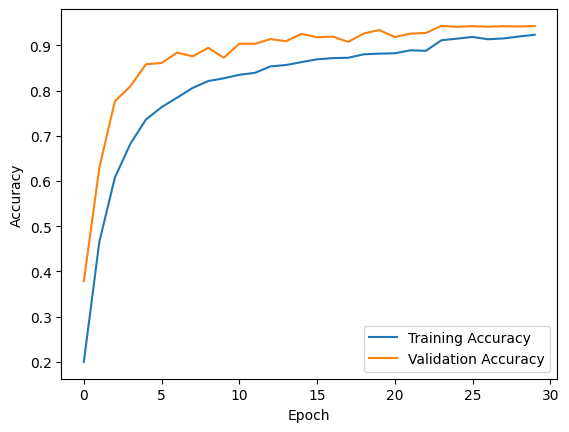

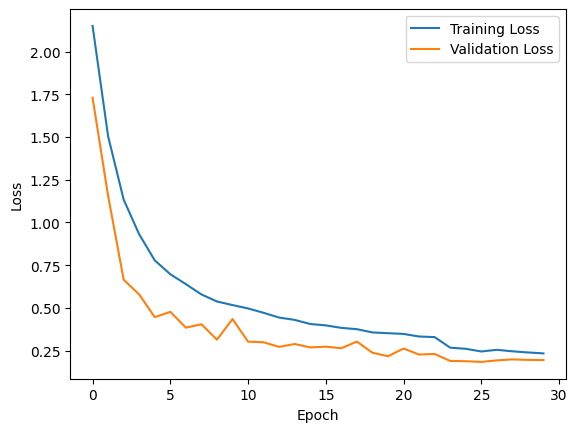

In [74]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [79]:
import pyaudio
import wave

# Define the audio settings
audio_format = pyaudio.paInt16
channels = 1
sample_rate = 16000
chunk_size = 1024
record_seconds = 3

# Initialize PyAudio
audio = pyaudio.PyAudio()

# Open the audio stream
stream = audio.open(format=audio_format, channels=channels,
                    rate=sample_rate, input=True,
                    frames_per_buffer=chunk_size)

# Record the audio
print('Recording...')
frames = []
for i in range(int(sample_rate / chunk_size * record_seconds)):
    data = stream.read(chunk_size)
    frames.append(data)

# Close the audio stream
stream.stop_stream()
stream.close()
audio.terminate()

# Save the audio file
wave_file = wave.open('recorded_audio.wav', 'wb')
wave_file.setnchannels(channels)
wave_file.setsampwidth(audio.get_sample_size(audio_format))
wave_file.setframerate(sample_rate)
wave_file.writeframes(b''.join(frames))
wave_file.close()

Recording...


In [80]:
# Load the audio file and extract MFCCs
audio, sr = librosa.load('recorded_audio.wav', sr=16000)
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
# Pad or truncate the MFCCs to a fixed number of frames
n_frames = 40
if mfccs.shape[1] < n_frames:
    mfccs = np.pad(mfccs, ((0, 0), (0, n_frames - mfccs.shape[1])), mode='constant')
else:
    mfccs = mfccs[:, :n_frames]
mfccs_normalized = (mfccs - np.mean(mfccs)) / np.std(mfccs)
mfccs_reshaped = mfccs_normalized.reshape((1, mfccs_normalized.shape[0], mfccs_normalized.shape[1], 1))

# Use the model to make predictions
predictions = model.predict(mfccs_reshaped)

# Get the class with the highest probability
predicted_class = np.argmax(predictions)

# Print the predicted class
print('Predicted class:', predicted_class)

1/1 [==============================] - 0s 28ms/step
Predicted class: 5
